In [1]:
import os, sys
import scanpy as sc
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import matplotlib.cm as cm
import anndata
import warnings
warnings.filterwarnings('ignore', category=anndata.ImplicitModificationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
sys.path.insert(
    0,
    '/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/script/spatial_pipeline/lib/utils'
)
from spatial.utils import getDefaultColors, removeBiasGenes, getDEG
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.serif'] = ['Arial']
sc.settings.set_figure_params(dpi=100,dpi_save=300,frameon=False,facecolor='white',fontsize=12,vector_friendly=True,figsize=(5,5))
sc._settings.ScanpyConfig(figdir='./',n_jobs=30)

In [3]:
od = '/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/project/PDAC/spatial/cellbin_v3/8.9_scRNA_Macro_sinature_score'
os.system(f'mkdir -p {od}')
os.chdir(od)

In [4]:
adata = sc.read('/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/project/yixianai/SC_reanalysis/result/3_cluster/macrophage/seurat_obj.h5ad')
adata = adata[~adata.obs['cellsubtype'].isin(['Macro_CTRB2_NMF_10','Macro_TFF2_NMF_21'])]

In [16]:
celltype_map = {
    'Macro_C3_NMF_11': 'Macro_C3',
    'Macro_CCR7_NMF_25': 'aDC_CCR7',
    'Macro_CD1A_NMF_5_6': 'iDC_CD1A',
    'Macro_CDKN1C_NMF_18': 'Macro_CDKN1C',
    'Macro_CPM_NMF_13': 'Macro_CPM',
    'Macro_IL1R2_NMF_15': 'Macro_IL1R2',
    'Macro_NMF_3': 'Macro_NMF_3',
    'Macro_NMF_4': 'Macro_NMF_4',
    'Macro_PLTP_NMF_19': 'Macro_PLTP',
    'Macro_SPP1_NMF_7_23': 'Macro_SPP1',
    'Macro_cycling_NMF_26': 'Macro_cycling'
}
adata.obs['cellsubtype'] = adata.obs['cellsubtype'].map(celltype_map)

/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/scanpy/scanpy/plotting/_tools/scatterplots.py:396: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


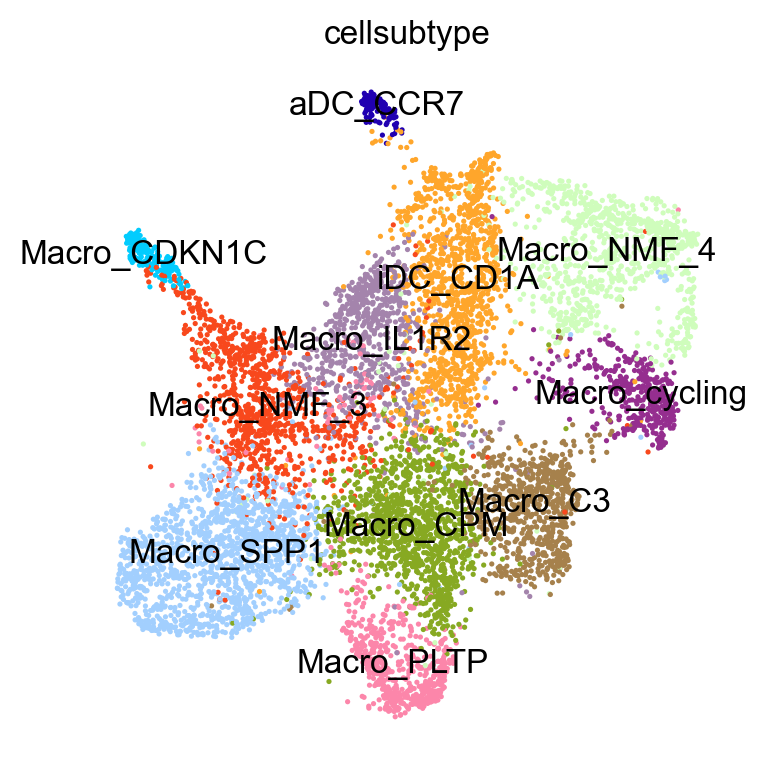

In [18]:
sc.settings.set_figure_params(dpi=100,dpi_save=300,frameon=False,facecolor='white',fontsize=12,vector_friendly=False,figsize=(4,4))
colors = getDefaultColors(adata.obs['cellsubtype'].unique().shape[0],type=9)
sc.pl.umap(adata, color='cellsubtype',palette=colors,legend_loc='on data',save='macro_cell_subtype_umap.pdf')

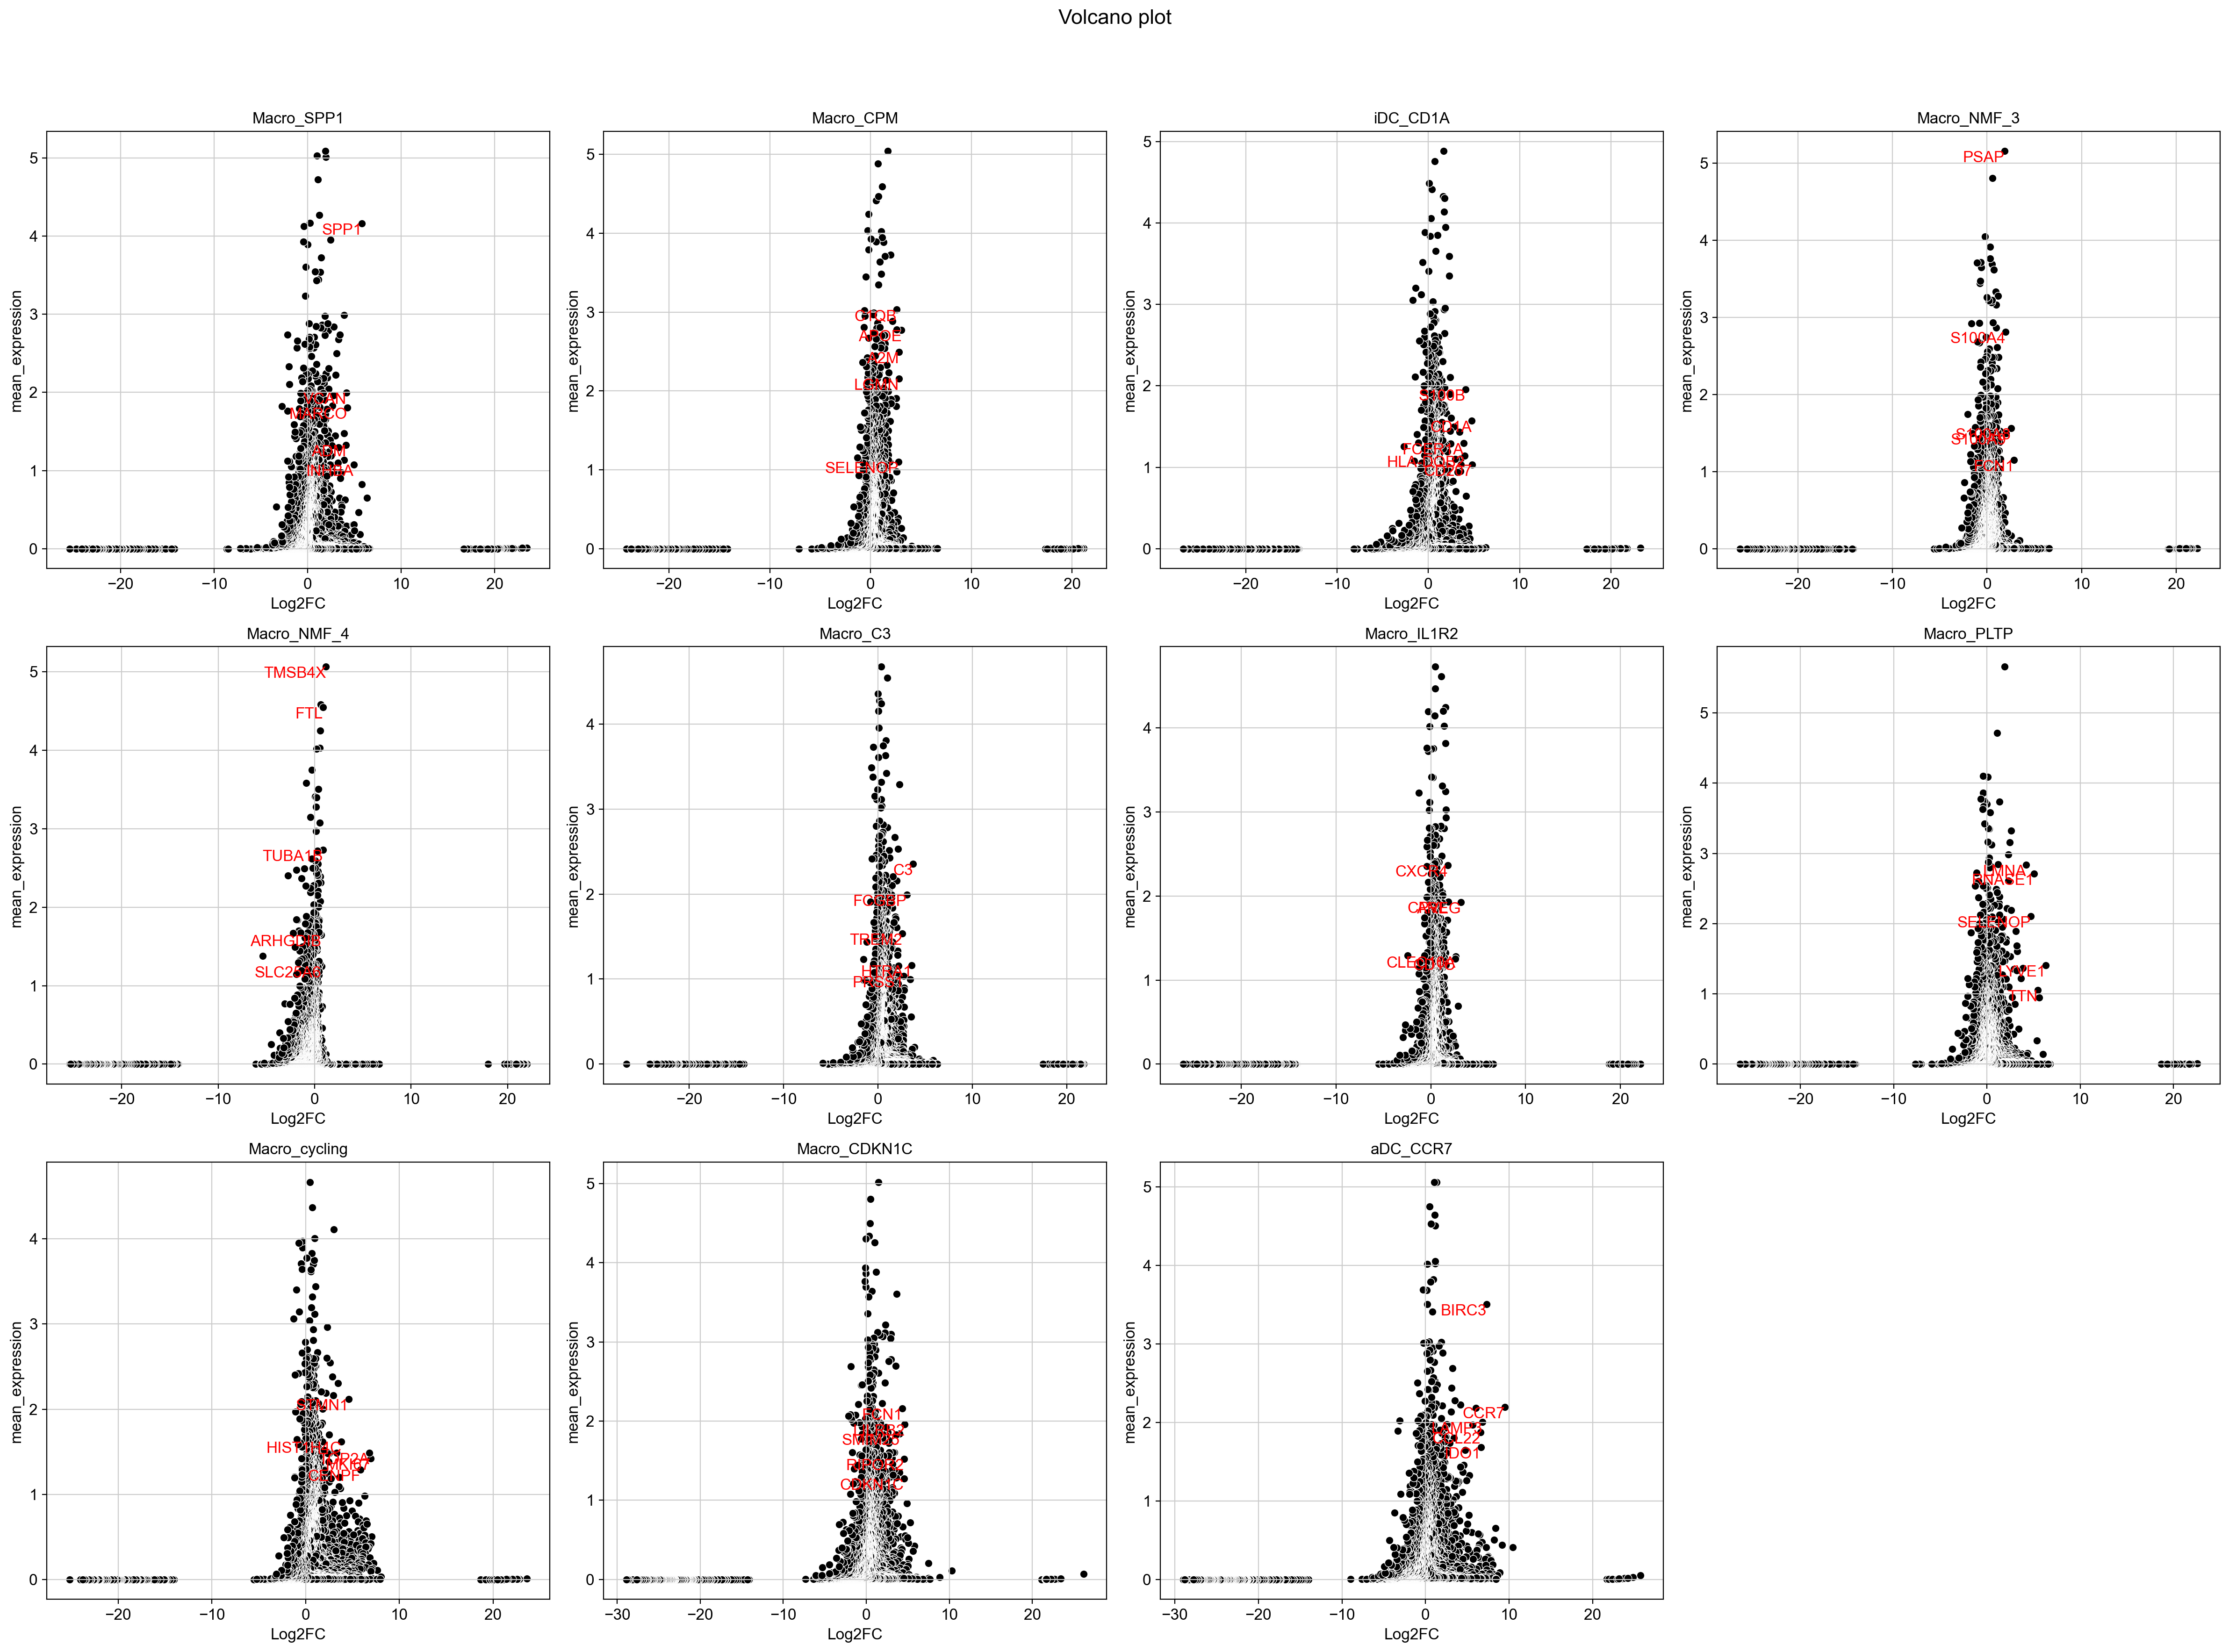

In [19]:
sc.tl.rank_genes_groups(adata,
                        'cellsubtype',
                        method='wilcoxon',
                        use_raw=False,
                        # layer='norm',
                        key_added='rank_genes_groups')
DEG_dict = getDEG(adata,
                    'cellsubtype',
                    qval_cutoff=0.05,
                    mean_expr_cutoff=1,
                #   layer='norm',
                    top_genes=3,
                    save=f'DEG_volcano.png')

In [20]:
DEG_dict

OrderedDict([('Macro_SPP1', ['SPP1', 'INHBA', 'MARCO']),
             ('Macro_CPM', ['APOE', 'LGMN', 'A2M']),
             ('iDC_CD1A', ['CD207', 'CD1A', 'S100B']),
             ('Macro_NMF_3', ['FCN1', 'S100A8', 'S100A9']),
             ('Macro_NMF_4', ['TMSB4X', 'TUBA1B', 'FTL']),
             ('Macro_C3', ['C3', 'HTRA1', 'FCGBP']),
             ('Macro_IL1R2', ['AREG', 'CLEC10A', 'CD1C']),
             ('Macro_PLTP', ['LYVE1', 'TTN', 'RNASE1']),
             ('Macro_cycling', ['MKI67', 'TOP2A', 'CENPF']),
             ('Macro_CDKN1C', ['LILRB2', 'RIPOR2', 'CDKN1C']),
             ('aDC_CCR7', ['CCR7', 'BIRC3', 'LAMP3'])])

In [22]:
from collections import OrderedDict
OrderedDict([('iDC_CD1A', ['CD207', 'CD1A', 'S100B']),
             ('aDC_CCR7', ['CCR7', 'BIRC3', 'LAMP3']),
             ('Macro_SPP1', ['SPP1', 'INHBA', 'MARCO']),
             ('Macro_CPM', ['APOE', 'LGMN', 'A2M']),
             ('Macro_NMF_3', ['FCN1', 'S100A8', 'S100A9']),
             ('Macro_NMF_4', ['TMSB4X', 'TUBA1B', 'FTL']),
             ('Macro_C3', ['C3', 'HTRA1', 'FCGBP']),
             ('Macro_IL1R2', ['AREG', 'CLEC10A', 'CD1C']),
             ('Macro_PLTP', ['LYVE1', 'TTN', 'RNASE1']),
             ('Macro_cycling', ['MKI67', 'TOP2A', 'CENPF']),
             ('Macro_CDKN1C', ['LILRB2', 'RIPOR2', 'CDKN1C'])])

OrderedDict([('iDC_CD1A', ['CD207', 'CD1A', 'S100B']),
             ('aDC_CCR7', ['CCR7', 'BIRC3', 'LAMP3']),
             ('Macro_SPP1', ['SPP1', 'INHBA', 'MARCO']),
             ('Macro_CPM', ['APOE', 'LGMN', 'A2M']),
             ('Macro_NMF_3', ['FCN1', 'S100A8', 'S100A9']),
             ('Macro_NMF_4', ['TMSB4X', 'TUBA1B', 'FTL']),
             ('Macro_C3', ['C3', 'HTRA1', 'FCGBP']),
             ('Macro_IL1R2', ['AREG', 'CLEC10A', 'CD1C']),
             ('Macro_PLTP', ['LYVE1', 'TTN', 'RNASE1']),
             ('Macro_cycling', ['MKI67', 'TOP2A', 'CENPF']),
             ('Macro_CDKN1C', ['LILRB2', 'RIPOR2', 'CDKN1C'])])

/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/scanpy/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)
/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/scanpy/scanpy/plotting/_utils.py:292: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pl.savefig(filename, dpi=dpi, bbox_inches='tight')
/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/miniconda/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


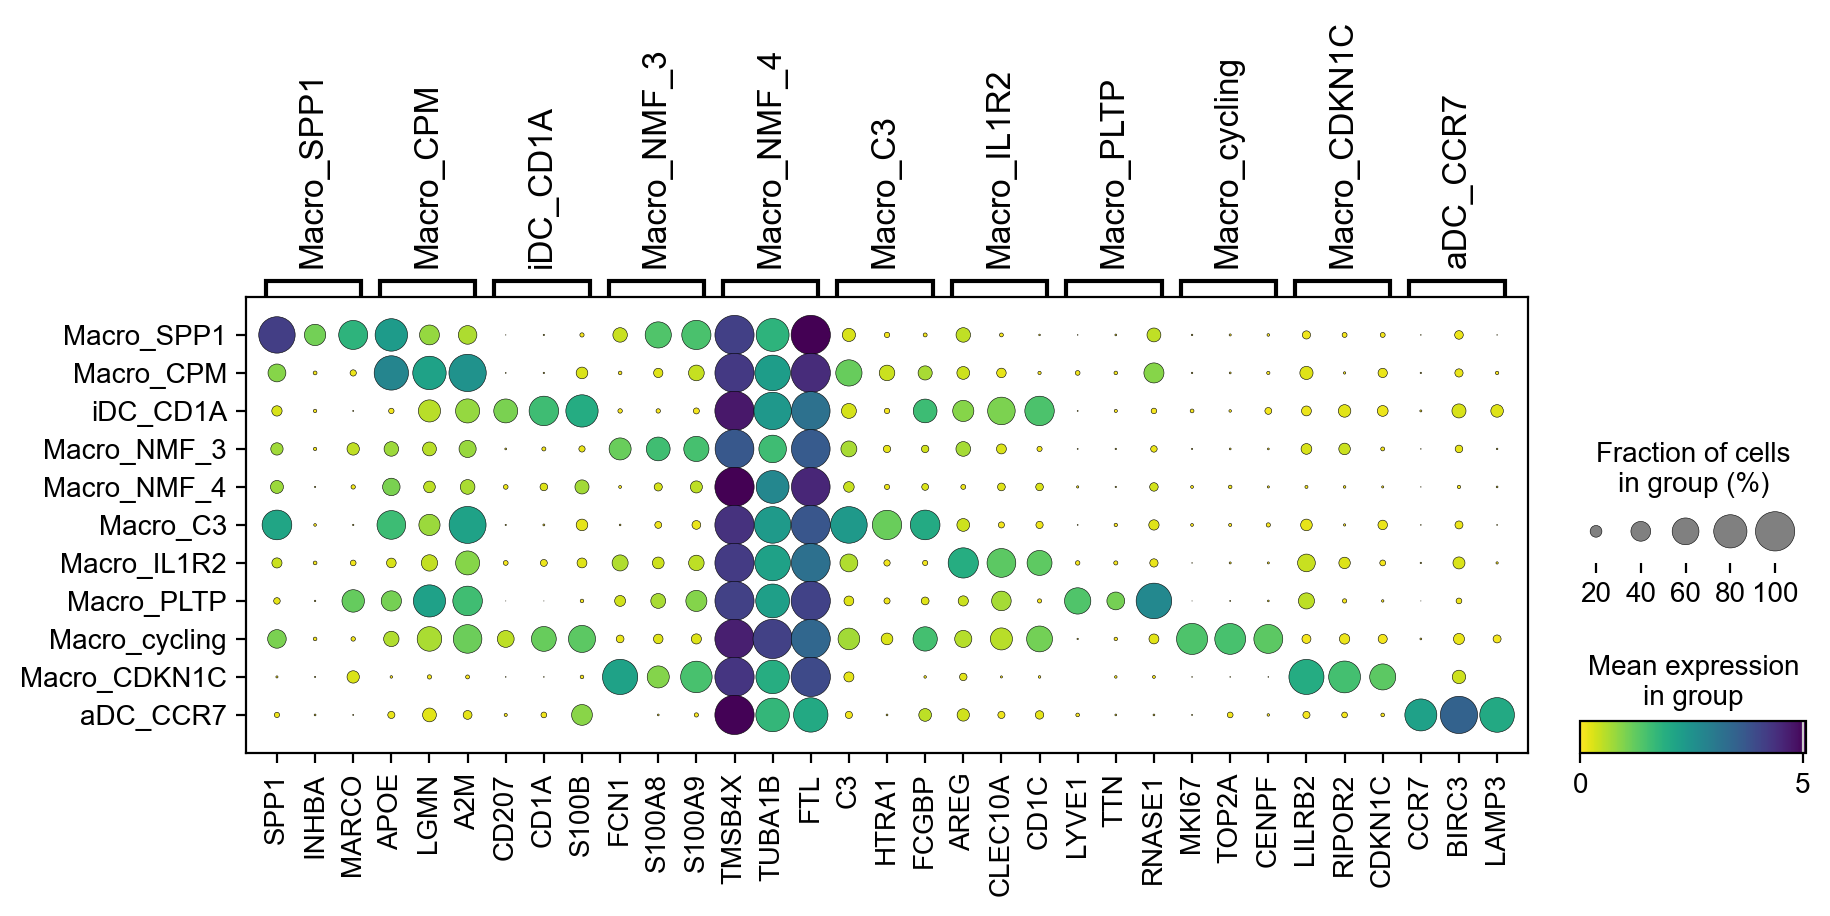

In [23]:
sc.pl.dotplot(adata, DEG_dict, groupby='cellsubtype',cmap='viridis_r',save='scRNA_DEG_dotplot_macrophage.pdf',figsize=(10,3))

/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/miniconda/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


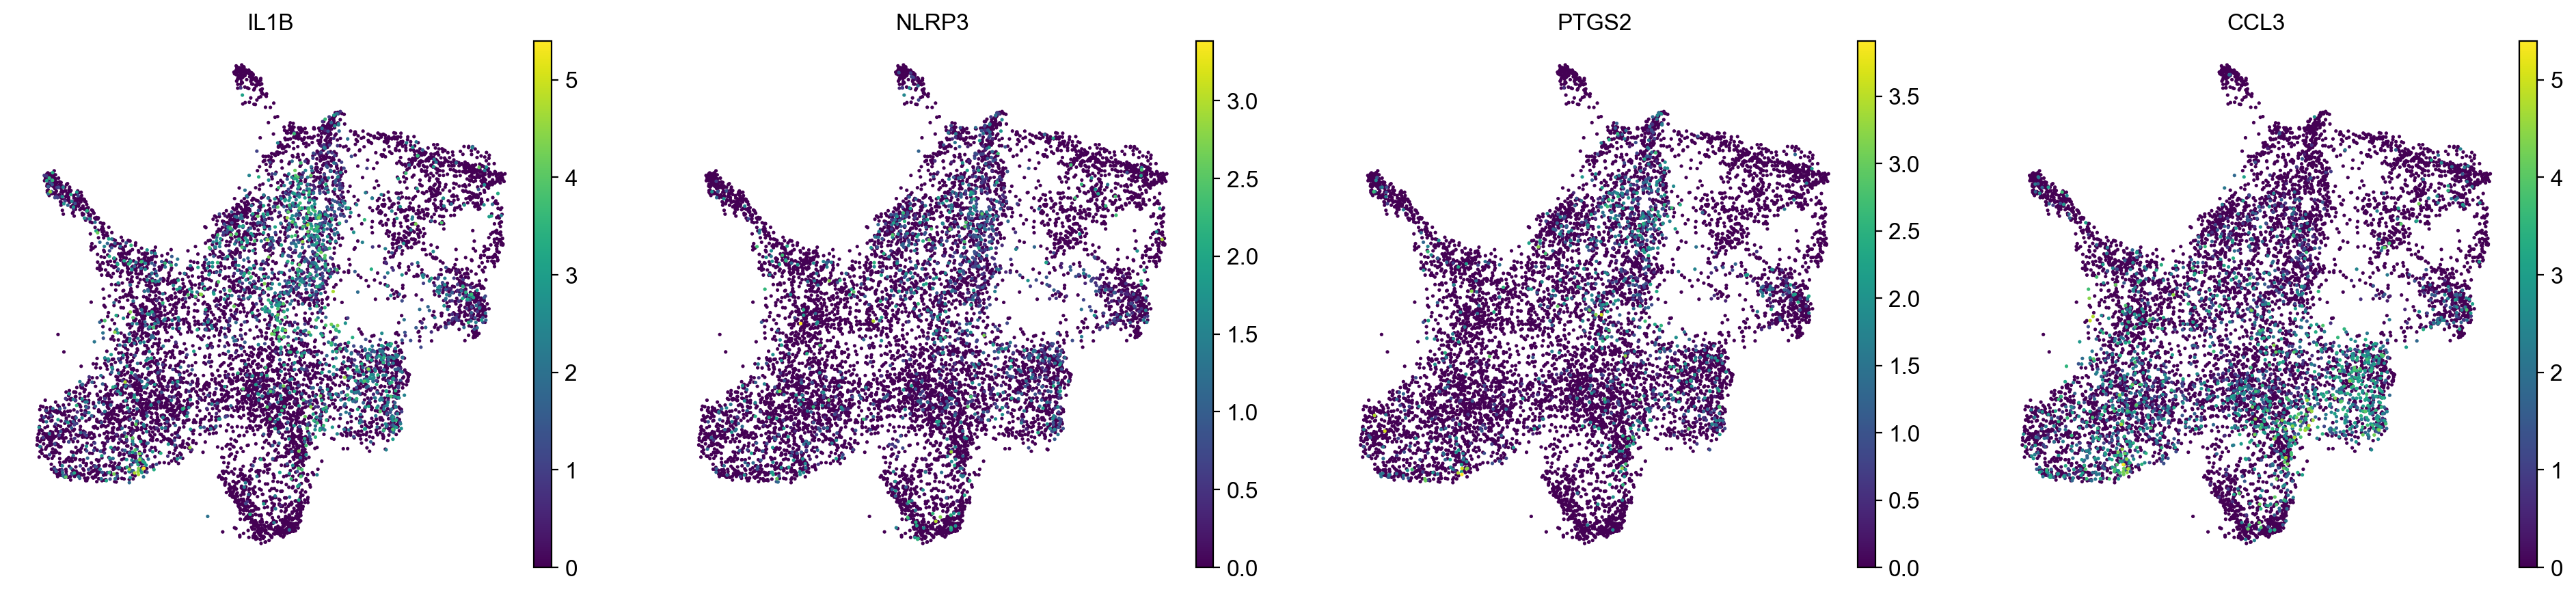

In [6]:
sc.pl.umap(adata,color=['IL1B','NLRP3','PTGS2','CCL3'],use_raw=False)

In [19]:
from ctxcore.genesig import GeneSignature

sig = GeneSignature.from_gmt('/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/database/signature/signature.gmt')
macro_signature_list = ["CIBERSORT.Macrophages.M0","CIBERSORT.Macrophages.M1","CIBERSORT.Macrophages.M2","Bernard_Dendritic","Bernard_Cytotoxic.T","Hosein_Mac2.1","Hosein_Mac2.2","Hosein_Mac3.1","Hosein_Mac3.2","Hosein_Mac3.3"]
sig_macro = []
for i in sig:
    if i.name in macro_signature_list:
        sig_macro.append(i)
from pyscenic.aucell import aucell
exp_mtx = pd.DataFrame(adata.X.toarray(),index=adata.obs_names,columns=adata.var_names)
auc_mtx = aucell(exp_mtx, sig_macro, noweights=True, num_workers=20)
adata.obs[auc_mtx.columns] = auc_mtx.fillna(0)
sc.settings.set_figure_params(dpi=100,dpi_save=300,frameon=False,facecolor='white',fontsize=12,vector_friendly=True,figsize=(5,5))
sc.pl.umap(adata, color=auc_mtx.columns, wspace=0.4, show=False, save="_sc_macro_score1.pdf",ncols=4)

meta NOT subset; don't know how to subset; dropped


[<AxesSubplot: title={'center': 'CIBERSORT.Macrophages.M0'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot: title={'center': 'CIBERSORT.Macrophages.M1'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot: title={'center': 'CIBERSORT.Macrophages.M2'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot: title={'center': 'Bernard_Dendritic'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot: title={'center': 'Bernard_Cytotoxic.T'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot: title={'center': 'Hosein_Mac2.1'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot: title={'center': 'Hosein_Mac2.2'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot: title={'center': 'Hosein_Mac3.1'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot: title={'center': 'Hosein_Mac3.2'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot: title={'center': 'Hosein_Mac3.3'}, xlabel='UMAP1', ylabel='UMAP2'>]

In [7]:
auc_mtx.columns

Index(['Moffitt.Basal.25', 'Moffitt.Classical.25', 'Moffitt.Normal.25',
       'Moffitt.Activated.25', 'Collisson.Classical', 'Collisson.Exocrine',
       'Collisson.QM', 'ICGC.ADEX.Up', 'ICGC.ADEX.Down', 'ICGC.Immunogenic.Up',
       ...
       'TCR', 'Notch.Signaling', 'proteosome', 'TSLPSig', 'endothelin',
       'insulinSig', 'EGFRSig', 'IL23Sig', 'IL18Sig', 'IL20Sig'],
      dtype='object', name='Regulon', length=300)

In [6]:
sig

[GeneSignature(name='Moffitt.Basal.25', gene2weight=frozendict.frozendict({'ANXA8L2': 1.0, 'AREG': 1.0, 'CST6': 1.0, 'CTSL2': 1.0, 'DHRS9': 1.0, 'FAM83A': 1.0, 'FGFBP1': 1.0, 'GPR87': 1.0, 'KRT15': 1.0, 'KRT17': 1.0, 'KRT6A': 1.0, 'KRT6C': 1.0, 'KRT7': 1.0, 'LEMD1': 1.0, 'LY6D': 1.0, 'S100A2': 1.0, 'SCEL': 1.0, 'SERPINB3': 1.0, 'SERPINB4': 1.0, 'SLC2A1': 1.0, 'SPRR1B': 1.0, 'SPRR3': 1.0, 'TNS4': 1.0, 'UCA1': 1.0, 'VGLL1': 1.0})),
 GeneSignature(name='Moffitt.Classical.25', gene2weight=frozendict.frozendict({'AGR2': 1.0, 'AGR3': 1.0, 'ANXA10': 1.0, 'ATAD4': 1.0, 'BTNL8': 1.0, 'CDH17': 1.0, 'CEACAM6': 1.0, 'CLRN3': 1.0, 'CTSE': 1.0, 'CYP3A7': 1.0, 'FAM3D': 1.0, 'KRT20': 1.0, 'LGALS4': 1.0, 'LOC400573': 1.0, 'LYZ': 1.0, 'MYO1A': 1.0, 'PLA2G10': 1.0, 'REG4': 1.0, 'SPINK4': 1.0, 'ST6GALNAC1': 1.0, 'TFF1': 1.0, 'TFF2': 1.0, 'TFF3': 1.0, 'TSPAN8': 1.0, 'VSIG2': 1.0})),
 GeneSignature(name='Moffitt.Normal.25', gene2weight=frozendict.frozendict({'ABCA8': 1.0, 'ACTG2': 1.0, 'ADAMTS1': 1.0, 'ANGP

/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/miniconda/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


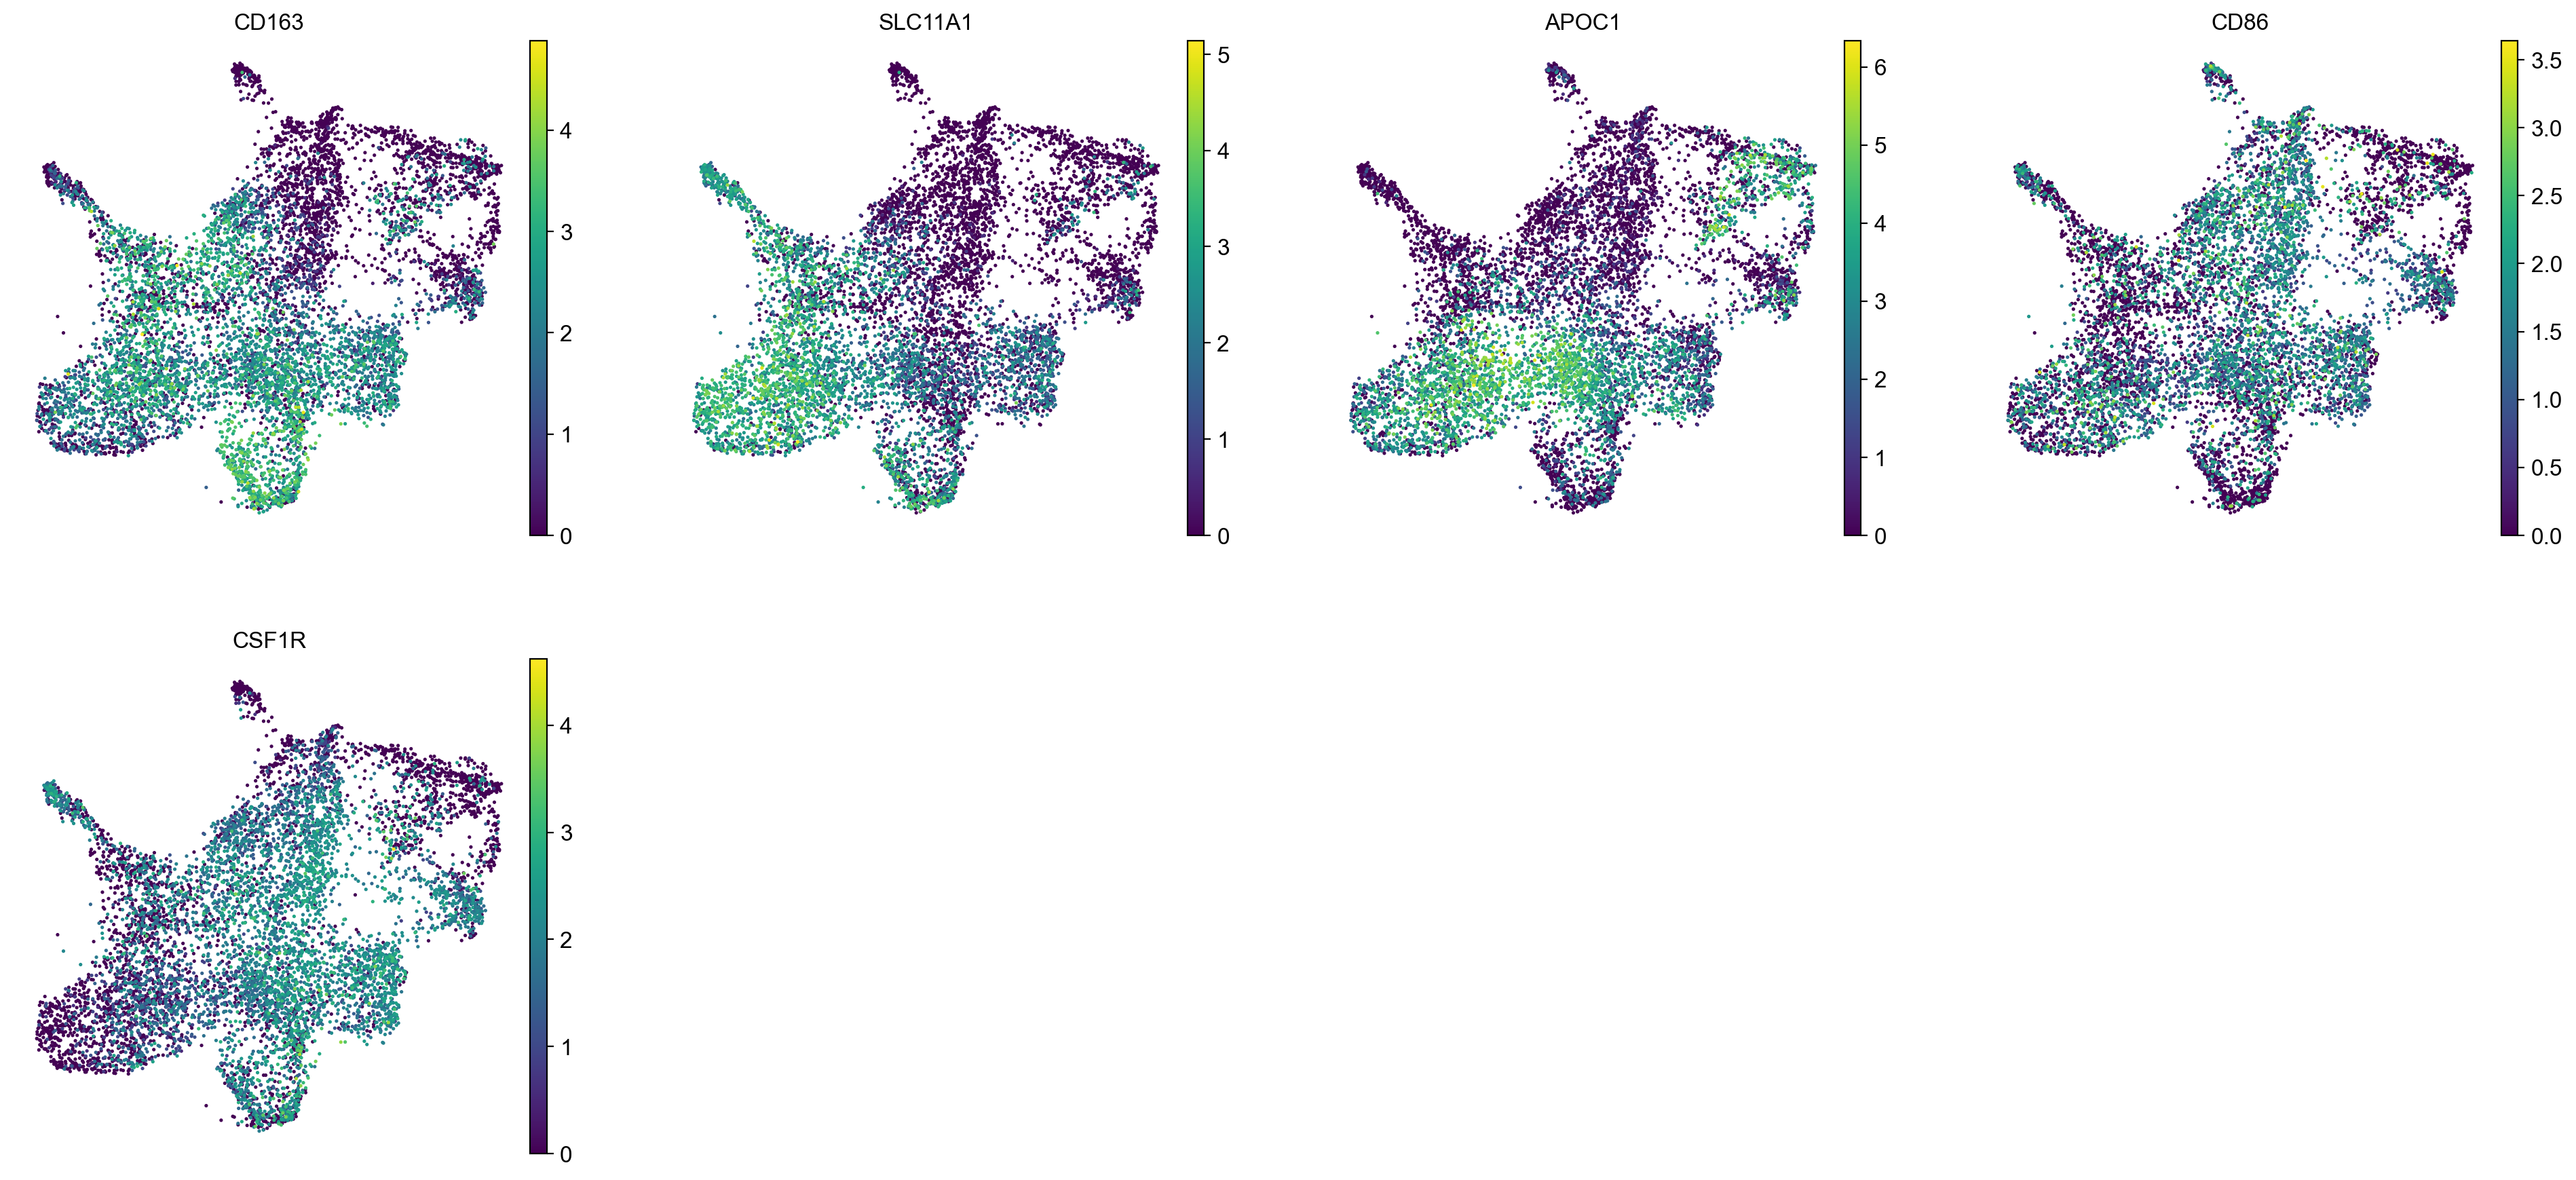

In [30]:
sc.pl.umap(adata,color=["CD163", "SLC11A1", "APOC1", "CD86", "CSF1R"])